In [ ]:
Load libs

In [ ]:
from src.sentiment import sentiment_score
from src.data_prep import load_news
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(".."))  # Or the path to your project root

df = load_news("../data/raw_analyst_ratings.csv")
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


Daily price change


In [ ]:
df['headline_length'] = df['headline'].str.split().str.len()
df['headline_length'].describe()

count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length, dtype: float64

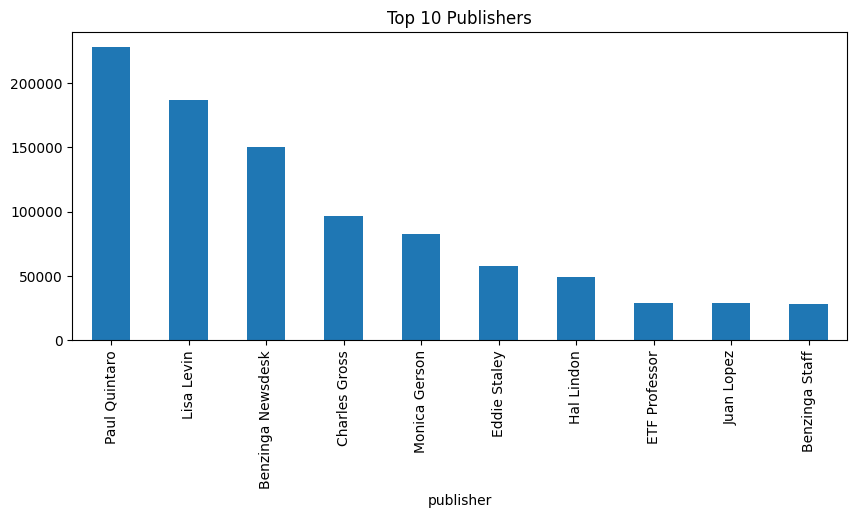

In [ ]:
df['publisher'].value_counts().head(10).plot(kind='bar', figsize=(10, 4))
plt.title("Top 10 Publishers")
plt.show()

In [ ]:
df['sentiment'] = df['headline'].apply(sentiment_score)
df[['headline', 'sentiment']].head()

,headline,sentiment
0,Stocks That Hit 52-Week Highs On Friday,0.000
1,Stocks That Hit 52-Week Highs On Wednesday,0.000
2,71 Biggest Movers From Friday,0.000
3,46 Stocks Moving In Friday's Mid-Day Session,0.000
4,B of A Securities Maintains Neutral on Agilent...,0.296


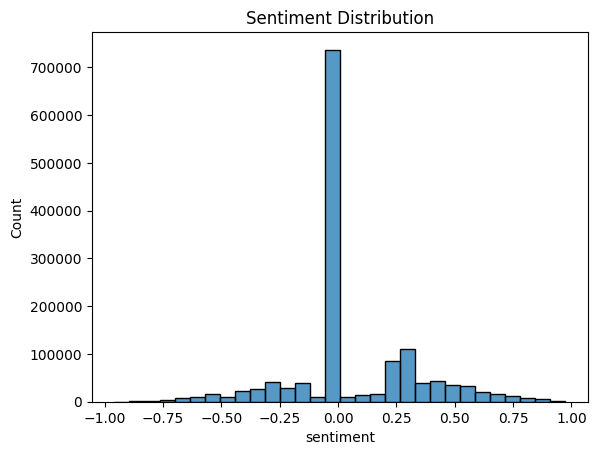

In [ ]:
sns.histplot(df['sentiment'], bins=30)
plt.title("Sentiment Distribution")
plt.show()

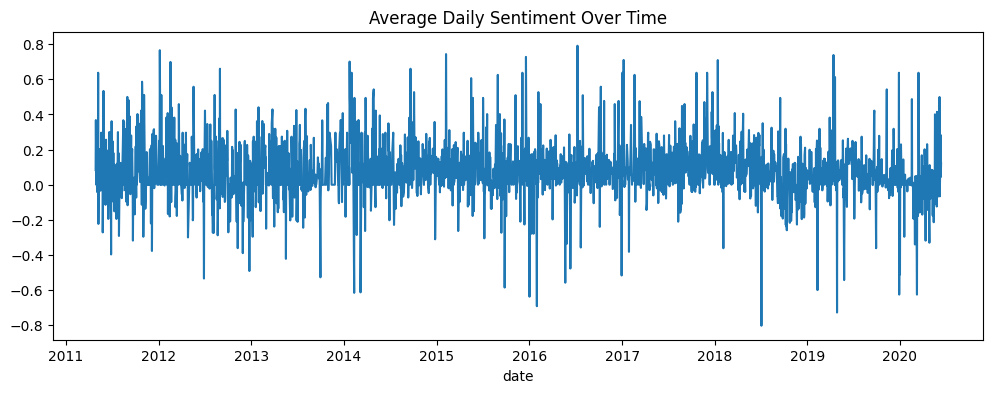

In [ ]:
daily_sent = df.groupby(df['date'].dt.date)['sentiment'].mean()
daily_sent.plot(figsize=(12, 4))
plt.title("Average Daily Sentiment Over Time")
plt.show()

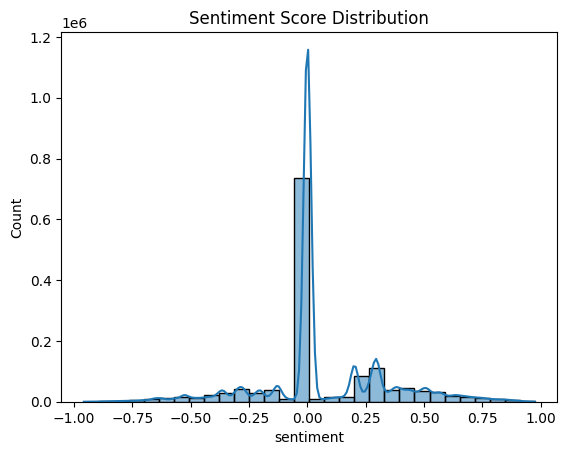

In [ ]:
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.show()

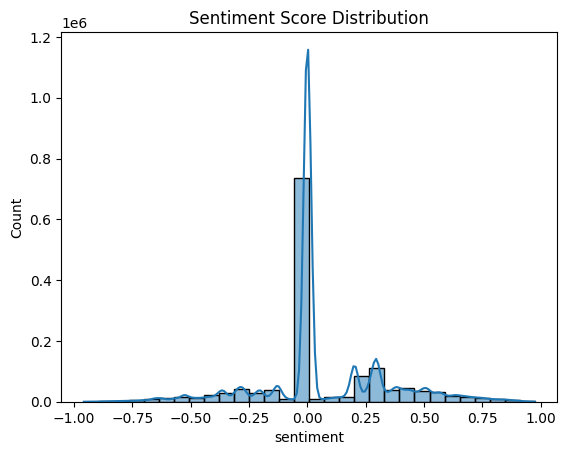

In [ ]:
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.show()

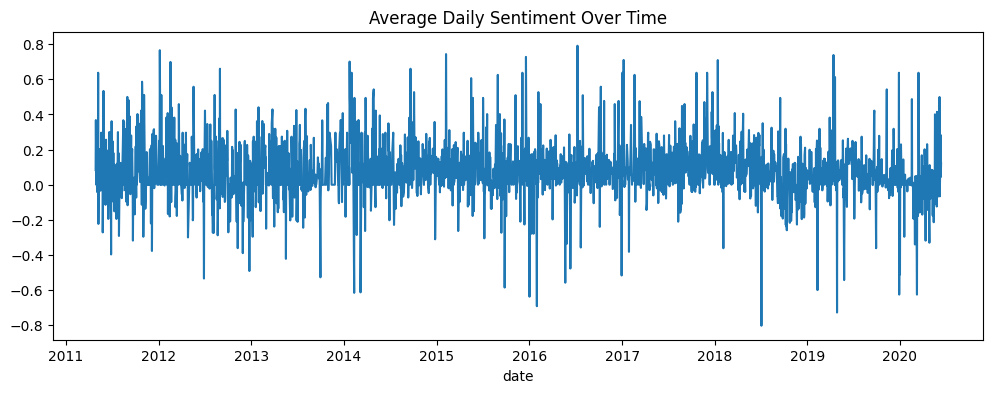

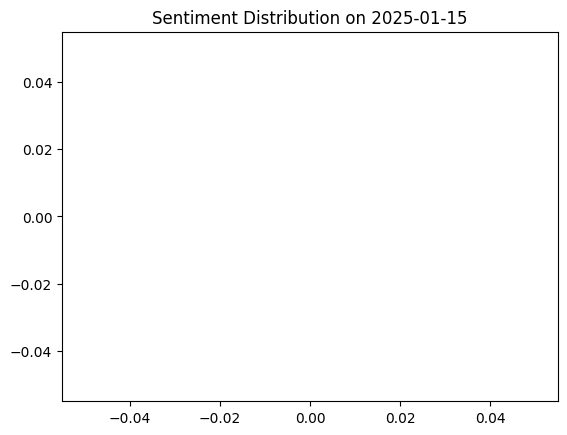

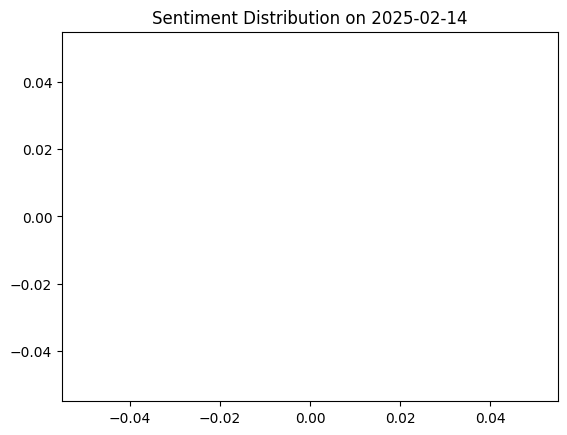

In [ ]:
# Daily Average Sentiment
daily_sent = df.groupby(df['date'].dt.date)['sentiment'].mean()
daily_sent.plot(figsize=(12, 4))
plt.title("Average Daily Sentiment Over Time")
plt.show()

# Event Windows: e.g., earnings days
earnings_days = ['2025-01-15', '2025-02-14']  # Example
for day in earnings_days:
    day_sent = df[df['date'] == day]['sentiment']
    sns.histplot(day_sent, bins=20)
    plt.title(f"Sentiment Distribution on {day}")
    plt.show()